In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
data = pd.read_excel('data/Characteristics of Retirees - clean.xlsx')

# Define categories of interest
categories_of_interest = [
    "People who had contributed to a superannuation scheme",
    "People who had not contributed to a superannuation scheme",
    "People with a long-term health condition",
    "People without a long-term health condition",
    "Retired, left last job to retire",
    "Retired, lost last job due to illness or injury",
    "Retired, lost last job for economic reasons (retrenched)"
]

# Filter the data
filtered_data = data[data['Population of Interest'].isin(categories_of_interest)]

# Drop unnecessary columns
columns_to_drop = ['Year', 'Sex']
filtered_data = filtered_data.drop(columns=columns_to_drop, errors='ignore')
filtered_data.head()

,Population of Interest,Classification,Category,Retirement Age\n54 years and under\n'000,Retirement Age\n55 - 59 years\n'000,Retirement Age \n60 - 64 years\n'000,Retirement Age\n65 - 69 years\n'000,Retirement Age\n70 years and over\n'000,TOTAL,Average age at retirement in years
5016,"Retired, lost last job for economic reasons (r...",Age group,45 – 49 years,7.526,0.000,0.000,0.000,0.0,7.526,40.408
5017,"Retired, lost last job for economic reasons (r...",Age group,50 – 54 years,27.627,0.000,0.000,0.000,0.0,27.627,46.387
5018,"Retired, lost last job for economic reasons (r...",Age group,55 – 59 years,13.839,8.351,0.000,0.000,0.0,22.190,51.351
5019,"Retired, lost last job for economic reasons (r...",Age group,60 – 64 years,12.738,30.877,13.095,0.000,0.0,56.710,56.581
5020,"Retired, lost last job for economic reasons (r...",Age group,65 – 69 years,11.322,15.365,23.997,9.746,0.0,60.429,58.721


In [8]:
# Initialise dictionary
statistics_by_population = {}

# Calculate statistics for each category
for category in categories_of_interest:
    category_data = filtered_data[filtered_data['Population of Interest'] == category]
    stats = category_data['TOTAL'].describe()
    statistics_by_population[category] = stats

# Printing the statistics
for category, stats in statistics_by_population.items():
    print(f"Statistics for {category}:")
    print(stats)
    print("\n")

Statistics for People who had contributed to a superannuation scheme:
count     912.000000
mean      233.008725
std       328.152165
min         0.000000
25%        41.101500
50%       122.268500
75%       290.469000
max      2807.408000
Name: TOTAL, dtype: float64


Statistics for People who had not contributed to a superannuation scheme:
count     912.000000
mean      117.263896
std       173.934497
min         0.000000
25%        15.994250
50%        49.244500
75%       137.148250
max      1289.834000
Name: TOTAL, dtype: float64


Statistics for People with a long-term health condition:
count     912.000000
mean      295.173207
std       416.345826
min         0.000000
25%        48.780250
50%       143.246000
75%       373.917500
max      3472.607000
Name: TOTAL, dtype: float64


Statistics for People without a long-term health condition:
count    912.000000
mean      55.099397
std       78.359954
min        0.000000
25%        9.344750
50%       28.042500
75%       68.867500
max  

In [5]:
# Create df for category of interest 'super contribution'
super_contribution_df = filtered_data[filtered_data['Population of Interest'].isin([
    "People who had contributed to a superannuation scheme",
    "People who had not contributed to a superannuation scheme"
])]

super_contribution_df.head()

,Population of Interest,Classification,Category,Retirement Age\n54 years and under\n'000,Retirement Age\n55 - 59 years\n'000,Retirement Age \n60 - 64 years\n'000,Retirement Age\n65 - 69 years\n'000,Retirement Age\n70 years and over\n'000,TOTAL,Average age at retirement in years
5700,People who had contributed to a superannuation...,Age group,45 – 49 years,74.347,0.000,0.000,0.000,0.0,74.347,39.436
5701,People who had contributed to a superannuation...,Age group,50 – 54 years,112.588,0.000,0.000,0.000,0.0,112.588,44.044
5702,People who had contributed to a superannuation...,Age group,55 – 59 years,127.479,58.887,0.000,0.000,0.0,186.366,50.390
5703,People who had contributed to a superannuation...,Age group,60 – 64 years,118.184,131.188,82.394,0.000,0.0,331.766,54.983
5704,People who had contributed to a superannuation...,Age group,65 – 69 years,114.569,140.655,183.463,118.392,0.0,557.080,58.815


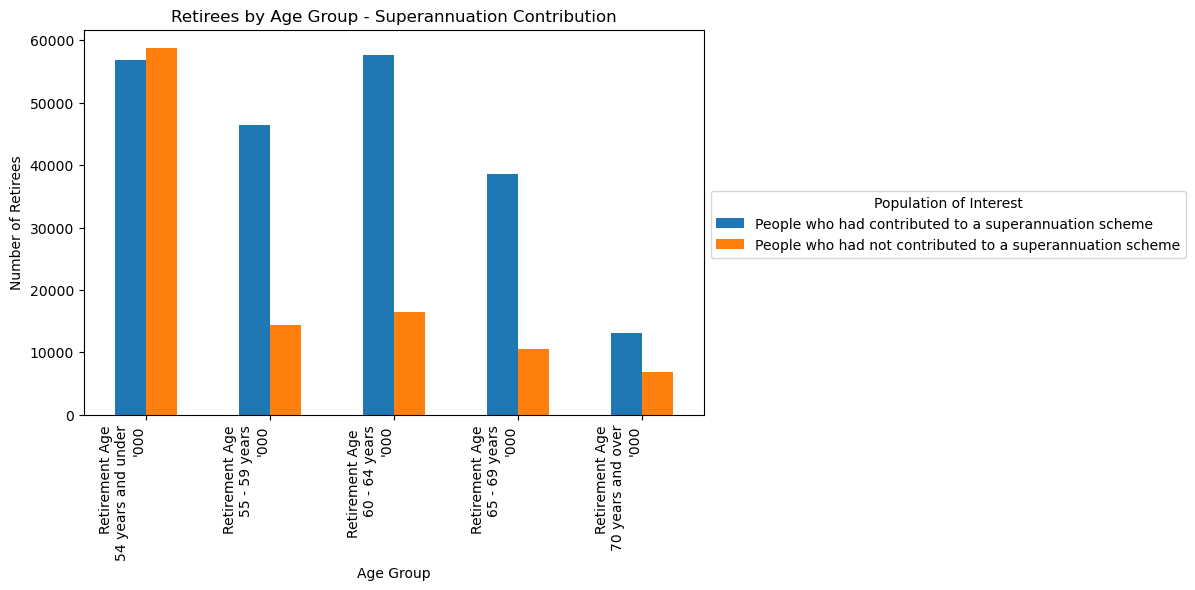

In [6]:
# Create a bar chart to show retirees by age group for the 'super contribution' category

# Select columns related to retirement ages
age_columns = [col for col in super_contribution_df.columns if 'Retirement Age' in col]

# Group by 'Population of Interest' and sum values for each age group
retirement_age_data = super_contribution_df.groupby('Population of Interest')[age_columns].sum()

# Transpose dataframe for easier plotting
retirement_age_data = retirement_age_data.T

# Plotting
plt.figure(figsize=(8, 5))
retirement_age_data.plot(kind='bar', ax=plt.gca())

# Adding title and labels
plt.title('Retirees by Age Group - Superannuation Contribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Retirees')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Population of Interest', bbox_to_anchor=(1, 0.6), loc='upper left')

# Showing the plot
plt.show()


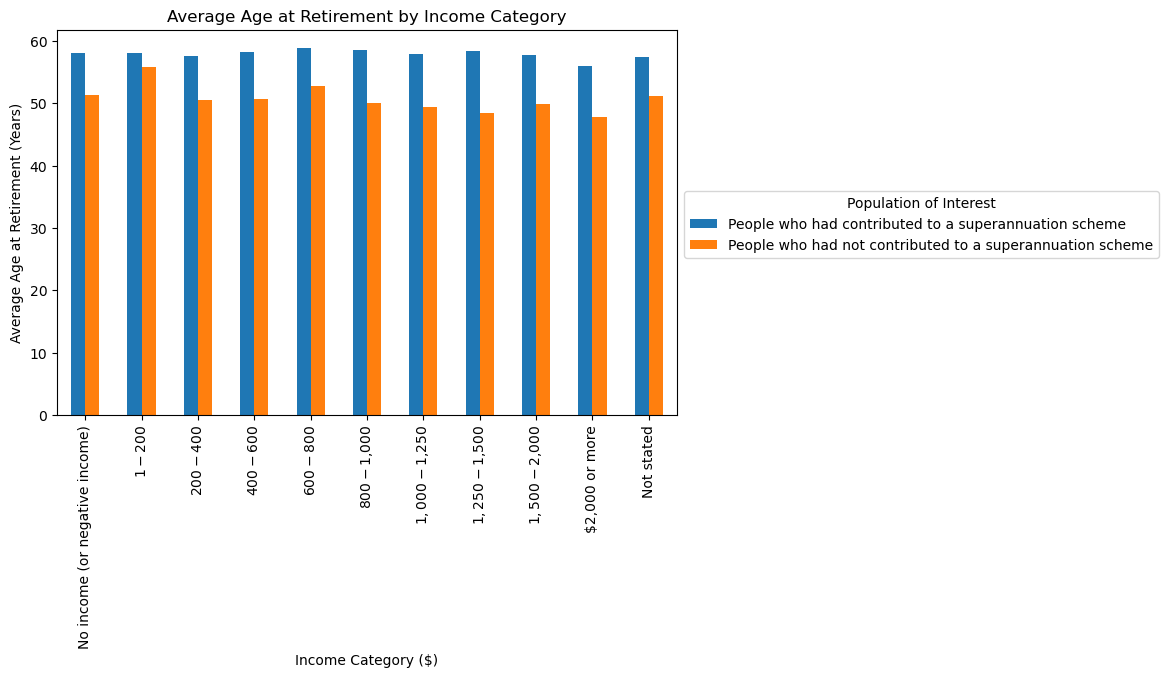

In [181]:
# Filter classification 'Weekly household income from all sources'
super_inc_data = super_contribution_df[super_contribution_df['Classification'] == 'Weekly household income from all sources']

# Aggregate the data
agg_income_data = super_inc_data.groupby(['Category', 'Population of Interest']).agg({'Average age at retirement in years': 'mean'}).reset_index()

# Income order
income_order = [
    'No income (or negative income)', '$1 - $200', '$200 - $400', '$400 - $600', 
    '$600 - $800', '$800 - $1,000', '$1,000 - $1,250', '$1,250 - $1,500', 
    '$1,500 - $2,000', '$2,000 or more', 'Not stated'
]

# Pivot the table for plotting
pivot_super_inc_data = agg_income_data.pivot(
    index='Category', 
    columns='Population of Interest', 
    values='Average age at retirement in years'
).reindex(income_order)

# Plotting
plt.figure(figsize=(8, 5))
pivot_super_inc_data.plot(kind='bar', ax=plt.gca())

# Adding title and labels
plt.title('Average Age at Retirement by Income Category')
plt.xlabel('Income Category ($)')
plt.ylabel('Average Age at Retirement (Years)')
plt.xticks(rotation=90)
plt.legend(title='Population of Interest', bbox_to_anchor=(1, 0.6), loc='upper left')

# Show the plot
plt.show()

In [7]:
# Create df for category of interest 'health condition'

health_condition_df = filtered_data[filtered_data['Population of Interest'].isin([
    "People with a long-term health condition",
    "People without a long-term health condition"
])]

health_condition_df.head()


,Population of Interest,Classification,Category,Retirement Age\n54 years and under\n'000,Retirement Age\n55 - 59 years\n'000,Retirement Age \n60 - 64 years\n'000,Retirement Age\n65 - 69 years\n'000,Retirement Age\n70 years and over\n'000,TOTAL,Average age at retirement in years
6384,People with a long-term health condition,Age group,45 – 49 years,88.638,0.000,0.000,0.000,0.0,88.638,36.666
6385,People with a long-term health condition,Age group,50 – 54 years,139.795,0.000,0.000,0.000,0.0,139.795,42.578
6386,People with a long-term health condition,Age group,55 – 59 years,167.952,57.957,0.000,0.000,0.0,225.909,47.388
6387,People with a long-term health condition,Age group,60 – 64 years,159.675,112.826,79.072,0.000,0.0,351.573,51.742
6388,People with a long-term health condition,Age group,65 – 69 years,177.387,147.109,161.972,97.531,0.0,583.998,55.986


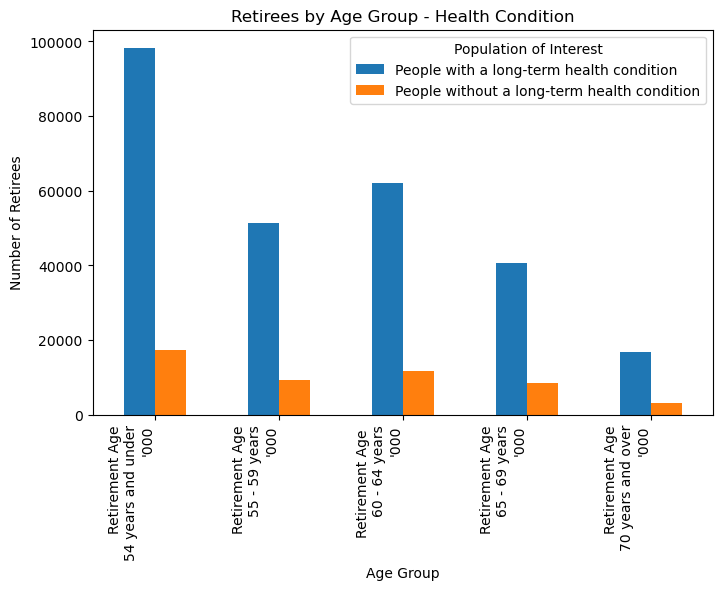

In [183]:
# Create a bar chart to show retirees by age group for the 'health condition' category

# Select columns related to retirement ages for the health condition dataframe
age_columns_health = [col for col in health_condition_df.columns if 'Retirement Age' in col]

# Group by 'Population of Interest' and sum values for each age group
retirement_age_data_health = health_condition_df.groupby('Population of Interest')[age_columns_health].sum()

# Transpose dataframe for easier plotting
retirement_age_data_health = retirement_age_data_health.T

# Plotting
plt.figure(figsize=(8, 5))
retirement_age_data_health.plot(kind='bar', ax=plt.gca())

# Adding title and labels
plt.title('Retirees by Age Group - Health Condition')
plt.xlabel('Age Group')
plt.ylabel('Number of Retirees')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Population of Interest')

# Showing the plot
plt.show()


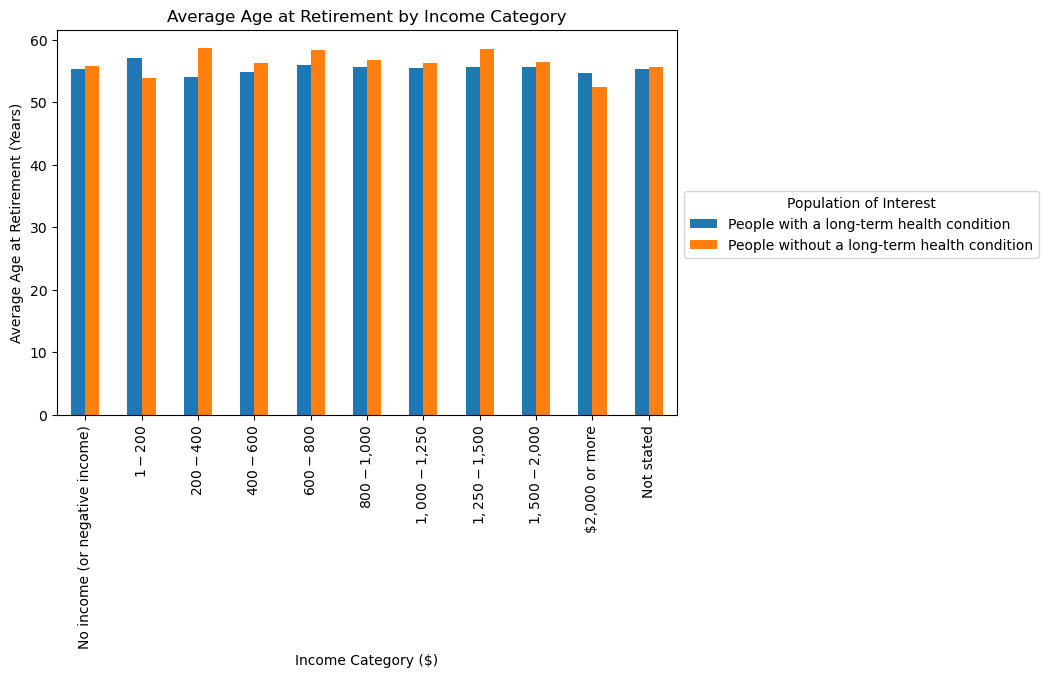

In [9]:
# Filter classification 'Weekly household income from all sources'
health_inc_data = health_condition_df[health_condition_df['Classification'] == 'Weekly household income from all sources']

# Aggregate the data
agg_inc_data = health_inc_data.groupby(['Category', 'Population of Interest']).agg({'Average age at retirement in years': 'mean'}).reset_index()

# Income order
income_order = [
    'No income (or negative income)', '$1 - $200', '$200 - $400', '$400 - $600', 
    '$600 - $800', '$800 - $1,000', '$1,000 - $1,250', '$1,250 - $1,500', 
    '$1,500 - $2,000', '$2,000 or more', 'Not stated'
]

# Pivot the table for plotting
pivot_health_inc_data = agg_inc_data.pivot(
    index='Category', 
    columns='Population of Interest', 
    values='Average age at retirement in years'
).reindex(income_order)

# Plotting
plt.figure(figsize=(8, 5))
pivot_health_inc_data.plot(kind='bar', ax=plt.gca())

# Adding title and labels
plt.title('Average Age at Retirement by Income Category')
plt.xlabel('Income Category ($)')
plt.ylabel('Average Age at Retirement (Years)')
plt.xticks(rotation=90)
plt.legend(title='Population of Interest', bbox_to_anchor=(1, 0.6), loc='upper left')

# Show the plot
plt.show()

In [185]:
# Create df for category of interest 'reason for leaving job'
leave_job_df = filtered_data[filtered_data['Population of Interest'].isin([
    "Retired, left last job to retire",
    "Retired, lost last job due to illness or injury",
    "Retired, lost last job for economic reasons (retrenched)"
])]

leave_job_df.head()

,Population of Interest,Classification,Category,Retirement Age\n54 years and under\n'000,Retirement Age\n55 - 59 years\n'000,Retirement Age \n60 - 64 years\n'000,Retirement Age\n65 - 69 years\n'000,Retirement Age\n70 years and over\n'000,TOTAL,Average age at retirement in years
5016,"Retired, lost last job for economic reasons (r...",Age group,45 – 49 years,7.526,0.000,0.000,0.000,0.0,7.526,40.408
5017,"Retired, lost last job for economic reasons (r...",Age group,50 – 54 years,27.627,0.000,0.000,0.000,0.0,27.627,46.387
5018,"Retired, lost last job for economic reasons (r...",Age group,55 – 59 years,13.839,8.351,0.000,0.000,0.0,22.190,51.351
5019,"Retired, lost last job for economic reasons (r...",Age group,60 – 64 years,12.738,30.877,13.095,0.000,0.0,56.710,56.581
5020,"Retired, lost last job for economic reasons (r...",Age group,65 – 69 years,11.322,15.365,23.997,9.746,0.0,60.429,58.721


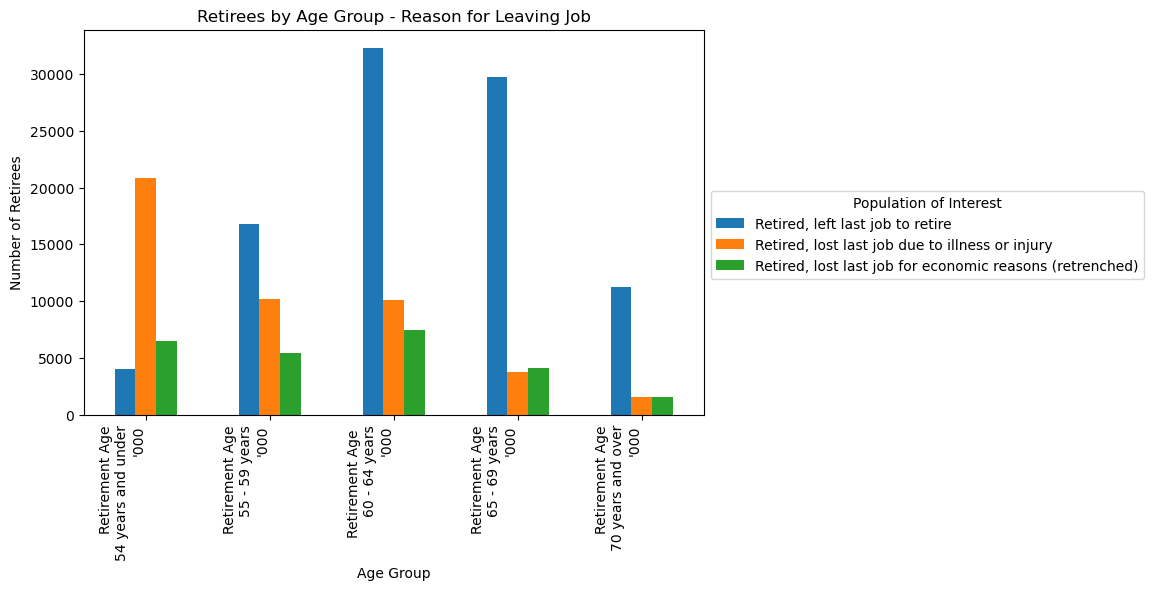

In [186]:
# Create bar chart to show retirees by age group for the category 'reason for leaving job'

# Select columns related to retirement age for the reason for leaving job dataframe
age_columns_reason = [col for col in reason_for_leaving_df.columns if 'Retirement Age' in col]

# Group by 'Population of Interest' and sum values for each age group
retirement_age_data_reason = leave_job_df.groupby('Population of Interest')[age_columns_reason].sum()

# Transposing the dataframe for easier plotting
retirement_age_data_reason = retirement_age_data_reason.T

# Plotting
plt.figure(figsize=(8, 5))
retirement_age_data_reason.plot(kind='bar', ax=plt.gca())

# Adding title and labels
plt.title('Retirees by Age Group - Reason for Leaving Job')
plt.xlabel('Age Group')
plt.ylabel('Number of Retirees')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Population of Interest', bbox_to_anchor=(1, 0.6), loc='upper left')


# Showing the plot
plt.show()


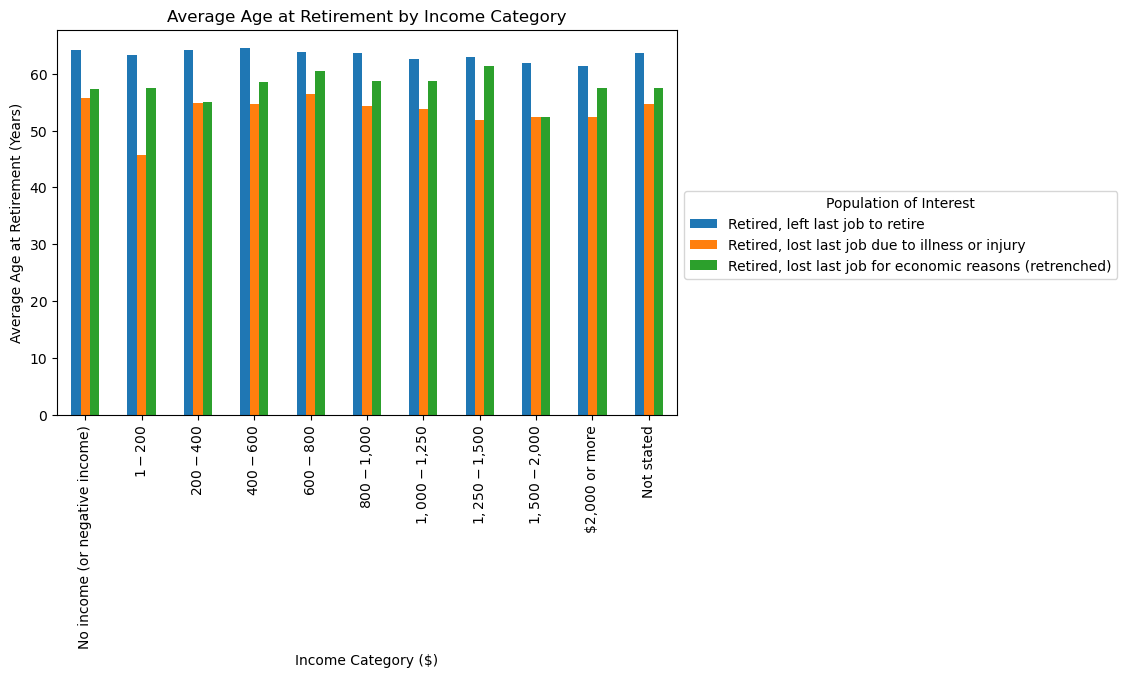

In [187]:
# Filter classification 'Weekly household income from all sources'
income_data = leave_job_df[leave_job_df['Classification'] == 'Weekly household income from all sources']

# Aggregate the data
aggregated_income_data = income_data.groupby(['Category', 'Population of Interest']).agg({'Average age at retirement in years': 'mean'}).reset_index()

# Income order
income_order = [
    'No income (or negative income)', '$1 - $200', '$200 - $400', '$400 - $600', 
    '$600 - $800', '$800 - $1,000', '$1,000 - $1,250', '$1,250 - $1,500', 
    '$1,500 - $2,000', '$2,000 or more', 'Not stated'
]

# Pivot the table for plotting
pivot_income_data = aggregated_income_data.pivot(
    index='Category', 
    columns='Population of Interest', 
    values='Average age at retirement in years'
).reindex(income_order)

# Plotting
plt.figure(figsize=(8, 5))
pivot_income_data.plot(kind='bar', ax=plt.gca())

# Adding title and labels
plt.title('Average Age at Retirement by Income Category')
plt.xlabel('Income Category ($)')
plt.ylabel('Average Age at Retirement (Years)')
plt.xticks(rotation=90)
plt.legend(title='Population of Interest', bbox_to_anchor=(1, 0.6), loc='upper left')

# Show the plot
plt.show()
